In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
os.chdir('C:\\book\\6. Проверка статистических гипотез\\')

In [3]:
df = pd.read_csv('town_1959_2.csv',encoding = 'cp1251')

c:\users\lokty\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='население', ylabel='Density'>

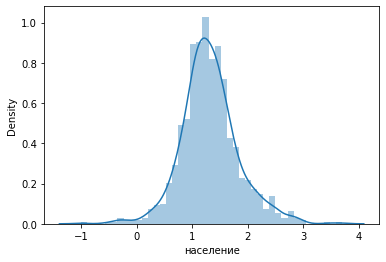

In [4]:

import seaborn as sns
sns.distplot(np.log10(df['население']))

In [5]:
res = stats.shapiro(np.log10(df['население']))
print('p-value',res[1])

p-value 3.1499833123838084e-12


Т.к значение p-value намного меньше альфы, не можем делать вывод о том, что распределение население имеет нормальное распределение. Отклонение от нормальности несущественно. Если убрать выбросы то, можно считать, что лог население имеет норм закон распрделения.

# Пример 2.

In [6]:
os.chdir('C:\\book\\6. Проверка статистических гипотез\\Albuquerque\\')
df = pd.read_csv('Albuquerque Home Prices_data.txt',sep = '\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить гипотезу о том, что квартиры на углу меньше покупают.Для проверки можно использовать t - критерий, при условии, что нормально распределены нужные значения, и есть равенство дисперсий.

In [7]:
df = df.replace(-9999,np.nan)

In [8]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [21]:
x = df[df['COR']== 1]['PRICE']
y = df[df['COR']== 0]['PRICE']
x.name,y.name = 'corner','not_corner'

In [1]:
def two_histogram(x,y):
    x.hist(alpha = 0.5, weights = [1./len(x)]*len(x))
    y.hist(alpha = 0.5, weights = [1./len(y)]*len(y))
    plt.axvline(x.mean(),color = 'red')
    plt.axvline(y.mean(),color = 'blue')
    plt.legend([x.name,y.name])

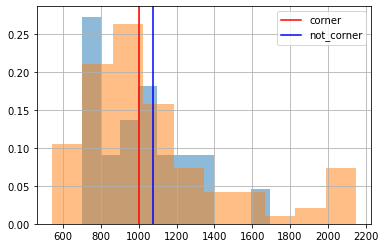

In [27]:
two_histogram(x,y)

In [28]:
res = stats.mannwhitneyu(x,y)
print('p-value',res[1])

p-value 0.40220407862126695


Выдвинутую гипотезу не принимаем

# Пример 3

In [41]:
os.chdir('C:\\book\\6. Проверка статистических гипотез\\')
df = pd.read_csv("agedeath.dat.txt", sep = '\s+',header = None,names = ['group','age','index'])
df.head(300)

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5
...,...,...,...
295,aris,38,296
296,aris,38,297
297,aris,38,298
298,aris,38,299


In [44]:
x = df[df['group']== 'sovr']['age']
y = df[df['group']== 'aris']['age']
x.name,y.name = 'sovr','aris'

In [2]:
two_histogram(x,y)

NameError: name 'x' is not defined

Данные условно нормальны.Проверим с помощью критерия Флингера-Килина равны ли дисперсии.

In [48]:
res = stats.fligner(x,y)
print('p-value',res[1])

p-value 0.00010116077103844913


In [51]:
res = stats.ttest_ind(x,y,equal_var = False) #equal_var = False - равенство дисперсий не предпологать
print('p-value',res[1])

p-value 1.5181184197728794e-26


# Пример 4


In [53]:
#Построим таблицу сопряженности.
table = pd.DataFrame([[28,72],[20,80]],
                    index = ['city','country'],
                    columns = ['for','against'])

In [56]:
table.head()

,for,against
city,28,72
country,20,80


In [55]:
res = stats.chi2_contingency(table)
print('p-value',res[1])

p-value 0.2464701206916715


# Пример 5

In [57]:
os.chdir('C:\\book\\6. Проверка статистических гипотез\\Albuquerque\\')
df = pd.read_csv('Albuquerque Home Prices_data.txt',sep = '\t')
df = df.replace(-9999,np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


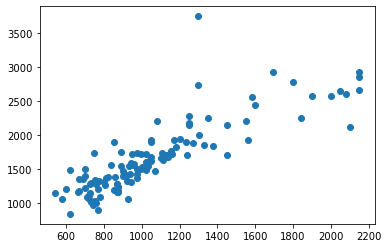

In [58]:
plt.scatter(df['PRICE'],df['SQFT'])

In [60]:
res = stats.pearsonr(df['PRICE'],df['SQFT'])
print('Person k',res[0])
print('p-value',res[1])

Person k 0.8447950985552123
p-value 5.146345707629239e-33
